<a href="https://colab.research.google.com/github/SasikiranJ/MNIST_PyTorch/blob/master/MNIST_pytorch_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
import torchvision
from IPython.display import display, Markdown
from tqdm import tqdm
import torchvision.transforms as transforms
import time

In [0]:
#Downloading mnist dataset
train_data = torchvision.datasets.MNIST(root="./data",train=True, download=True,transform = transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root = "./data",train=False,download=True, transform=transforms.ToTensor())

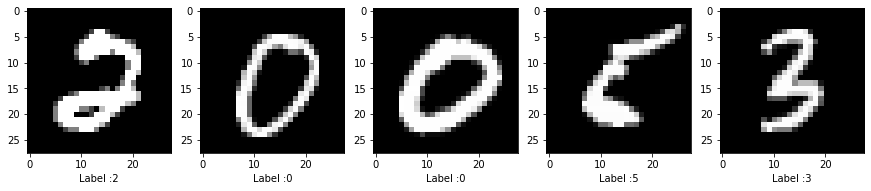

In [4]:
#Data
ind = random.sample(range(0,len(train_data)),5)
fig = plt.figure(figsize=(15,10))
for i,index in enumerate(ind):
    num = train_data[index][0].reshape(28,28)
    label = train_data[index][1]
    ax = fig.add_subplot(1,5,i+1)
    ax.set_xlabel("Label :{}".format(label))
    plt.imshow(num,cmap="gray")

In [0]:
#splitting training data into train and val sets
x_train,x_val = torch.utils.data.random_split(train_data,[int(0.92*len(train_data)),int(0.08*len(train_data))])

In [0]:
#loading data to three separate variables
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset = x_train,batch_size = batch_size)
val_loader = torch.utils.data.DataLoader(dataset = x_val,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset = test_data,batch_size=batch_size)

In [0]:
#Implementing own NN architecture for image classification using CNN
class LeNet5(nn.Module):
    def __init__(self,output_size):
        super(LeNet5,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,6,kernel_size = 5, stride = 1,padding = 2),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,12,kernel_size = 5, stride = 1),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(12,18,kernel_size = 5, stride = 1),
            nn.BatchNorm2d(18),
            nn.ReLU()
        )
        
        self.fc1 = nn.Linear(18,10)
        #self.fc2 = nn.Linear(84,10)        
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.fc1(x.view(x.size(0),-1))
        #x = self.fc2(x)
        return x

In [0]:
nepochs = 50
output_size = 10
lr = 0.01
model = LeNet5(output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(),lr=lr) # using RMSprop optimizer

In [0]:
#training our model
for epoch in range(nepochs):
    time.sleep(0.5)
    for i, (data, labels) in enumerate(tqdm(train_loader)):
        
        data = data.to(device)
        labels = labels.to(device)
                
        outputs = model(data)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, nepochs, loss.item()))

In [199]:
# accuracy on validation set
model.eval() #Tells batchnorm and droput layers to consider data as test
with torch.no_grad():
    correct = 0
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()        
print('Accuracy of the model on the {} validation images: {:.4f} %'.format(len(x_val),100*correct/ len(x_val)))

Accuracy of the model on the 4800 validation images: 99.1250 %


In [200]:
#accuracy on test set
model.eval()
with torch.no_grad():
    correct = 0
    test_incorrect = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        
        #Storing incorrectly classifed images
        for item in (predicted != labels).nonzero():
            test_incorrect.append([images.data[item],predicted[item],labels[item]])
print('Accuracy of the model on the {} test images: {} %'.format(len(test_data),100*correct/ len(test_data)))

Accuracy of the model on the 10000 test images: 98.68 %


In [0]:
#Total number of parameters
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

In [202]:
print(pytorch_total_params) # parameters less than 8000

7648
